In [195]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as plticker
from matplotlib import rcParams

In [209]:
Win1 = pd.read_csv("WindowsPhonePyt1.csv",header = 1)
Android1 = pd.read_csv("AndroidPyt1.csv",header = 1)
Android1FromGoogle = pd.read_csv("Andr1.csv",header = 1)
Apple1 = pd.read_csv("ApplePyt1.csv",header = 1)
Win1.columns = ['Month','Year','Questions']
Android1.columns = ['Month','Year','Questions']
Android1FromGoogle.columns = ['Month','Questions']
Apple1.columns = ['Month','Year','Questions']
Win1.set_index(['Year','Month'],inplace=True)
Android1.set_index(['Year','Month'],inplace=True)
Apple1.set_index(['Year','Month'],inplace=True)
Pyt1 = pd.concat([Android1,Apple1,Win1],keys=["Android","Apple","Windows"])

In [192]:
def draw_lineplot_ex1_concat(df,out_name):
    ax = df.unstack(level=0).plot(kind='line')
    # ax = df.plot()
    #tick_spacing = 1
    # ax.xaxis.set_major_locator(plticker.MultipleLocator(tick_spacing))
    ax.set_title(out_name,fontsize = 18)
    ax.legend(prop={'size':15})
    rcParams['figure.figsize'] = 16.7,12.27
    plt.savefig(f"{out_name}.jpg",dpi=90)
    plt.show()

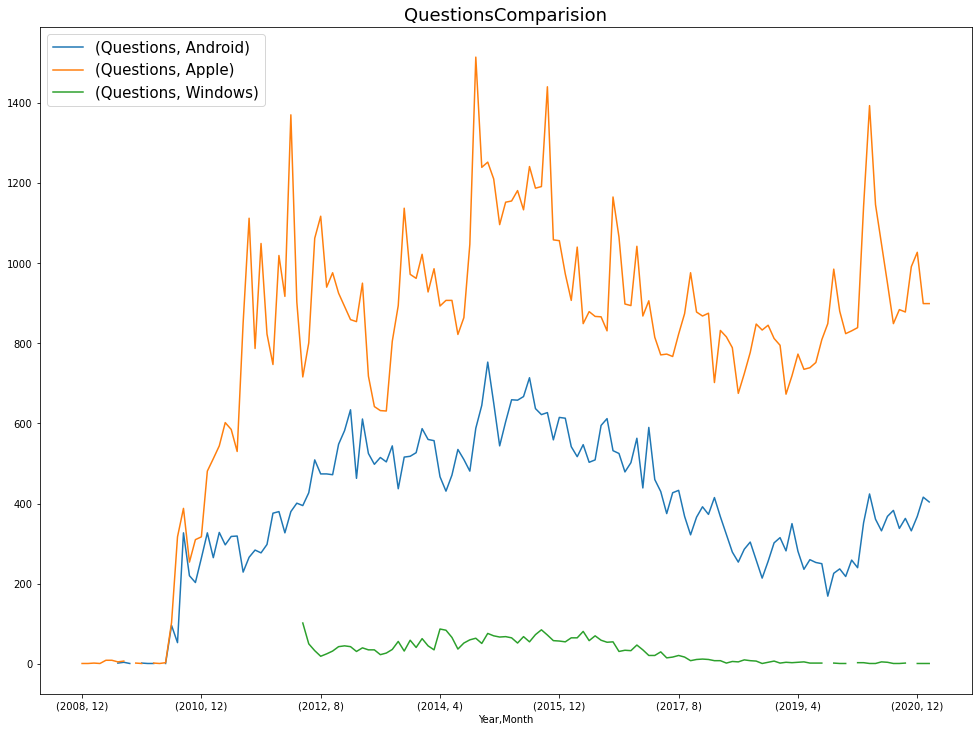

In [194]:
draw_lineplot_ex1_concat(Pyt1,"QuestionsComparision")

In [210]:
def draw_lineplot_ex1_from_google(df,out_name):
    ax = sns.lineplot('Month','Questions',data=df)
    tick_spacing = 12
    ax.xaxis.set_major_locator(plticker.MultipleLocator(tick_spacing))
    ax.set_title(out_name)
    rcParams['figure.figsize'] = 16.7,12.27
    plt.savefig(f"{out_name}.jpg",dpi=90)
    plt.show()

In [184]:
def draw_lineplot_ex1(df,out_name):
    #ax = sns.lineplot(df.index,'Questions',data=df)
    ax = df.plot()
    # tick_spacing = 1
    # ax.xaxis.set_major_locator(plticker.MultipleLocator(tick_spacing))
    ax.set_title(out_name,fontsize = 18)
    ax.legend(prop={'size':20})
    rcParams['figure.figsize'] = 16.7,12.27
    plt.savefig(f"{out_name}.jpg",dpi=90)
    plt.show()

A:\Inzynieria_i_Analiza_Danych_PW\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


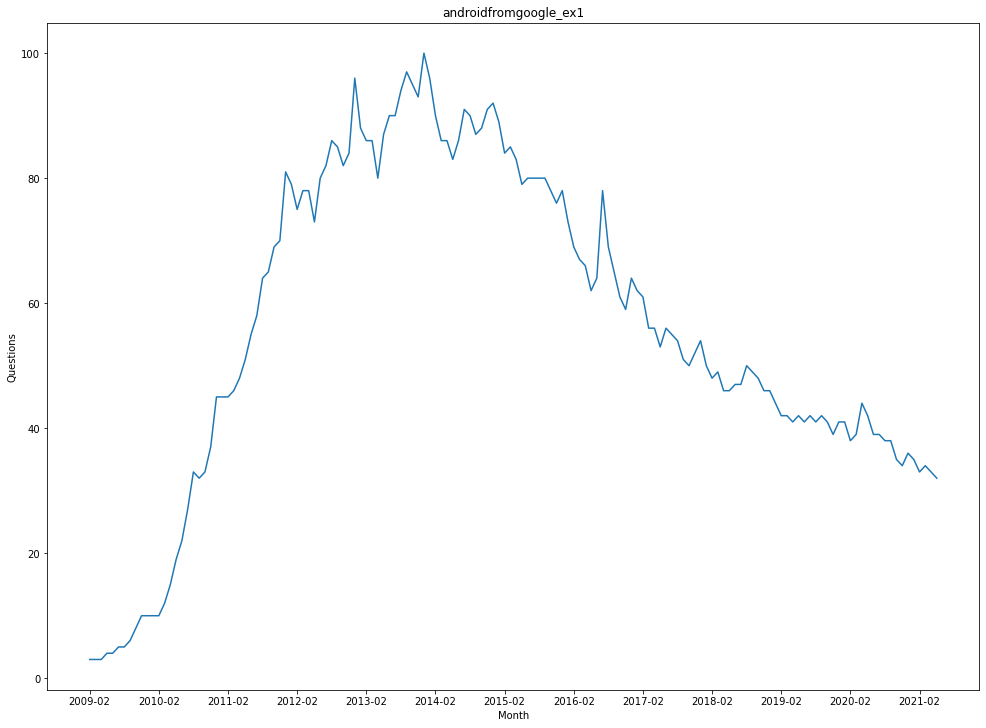

In [211]:
draw_lineplot_ex1_from_google(Android1FromGoogle,"androidfromgoogle_ex1")

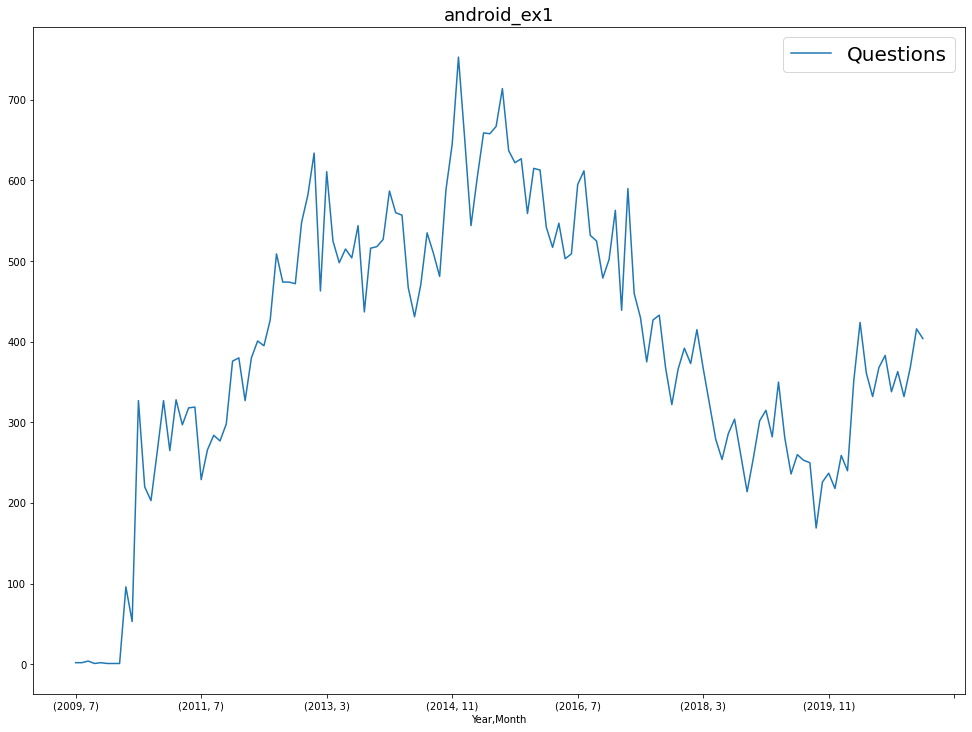

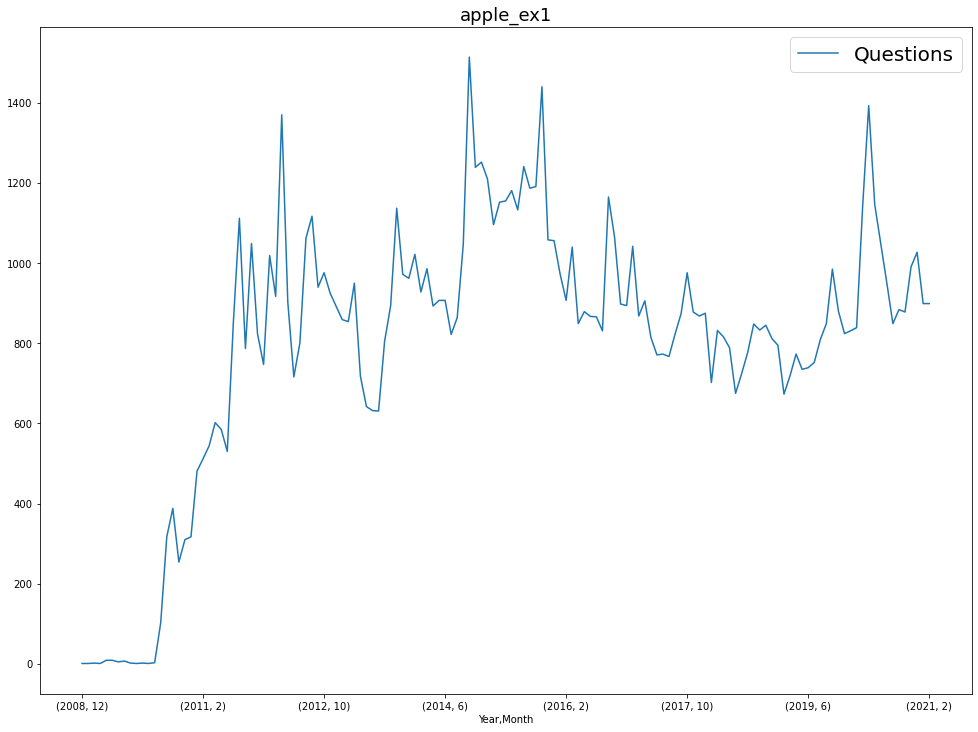

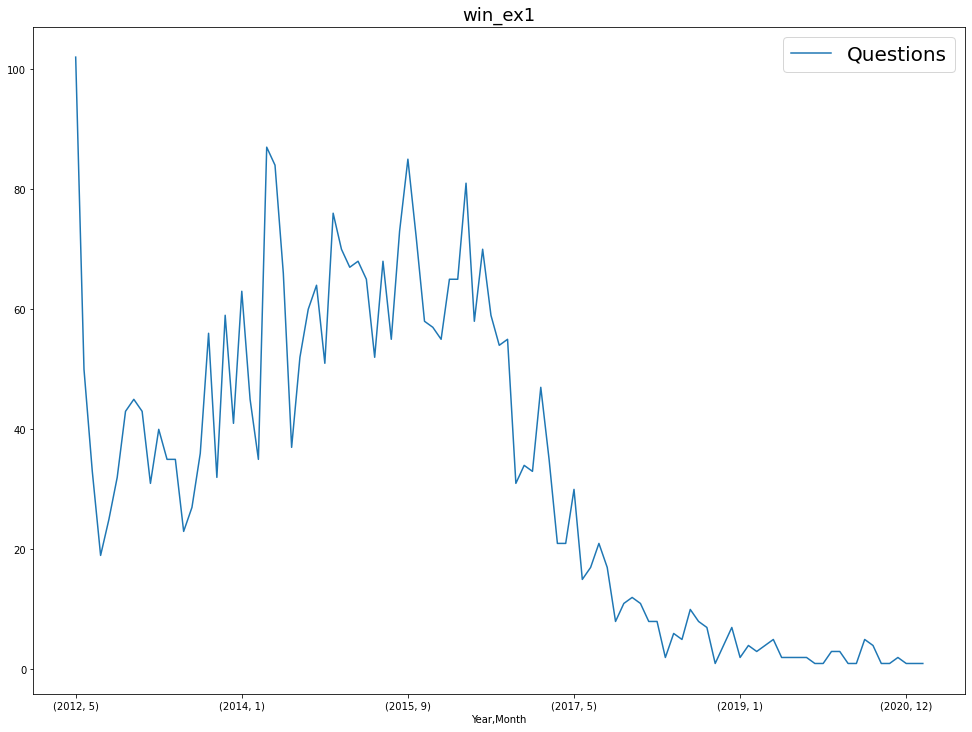

In [185]:
draw_lineplot_ex1(Android1,"android_ex1")
draw_lineplot_ex1(Apple1,"apple_ex1")
draw_lineplot_ex1(Win1,"win_ex1")


In [251]:
AndrPyt2 = pd.read_csv("AndroidPyt2.csv")
ApplePyt2 = pd.read_csv("ApplePyt2.csv")
WinPyt2 = pd.read_csv("WindowsPhonePyt2.csv")
Pyt2 = pd.read_csv("os_combined-ww-monthly-200901-202104.csv",sep = ';')
AndrPyt2
Pyt2Comb = pd.merge(pd.merge(AndrPyt2,ApplePyt2,"outer",['year','month']),WinPyt2,"outer",['year','month'])
Pyt2Comb = Pyt2Comb.sort_values(['year','month'])
Pyt2Comb.reset_index(drop=True,inplace=True)
Pyt2Comb.columns = ['month','year','Android','Apple','Windows']
Pyt2Comb.fillna(0,inplace=True)
Pyt2Comb

,month,year,Android,Apple,Windows
0,8,2010,0.0,492,0.0
1,9,2010,461.0,420,0.0
2,10,2010,254.0,206,0.0
3,11,2010,256.0,264,0.0
4,12,2010,333.0,302,0.0
...,...,...,...,...,...
122,10,2020,1808.0,2855,79.0
123,11,2020,1878.0,2918,79.0
124,12,2020,2230.0,3559,81.0
125,1,2021,2468.0,3793,56.0


In [252]:
Pyt2 = Pyt2.iloc[:,[0,2,1,3]]
Pyt2

,Date,Android,iOS,Windows
0,2009-01,"0,66","35,56","2,55"
1,2009-02,"2,06","36,43","2,47"
2,2009-03,"2,18","39,6","1,98"
3,2009-04,"2,02","41,91","1,75"
4,2009-05,"1,86","37,32","1,61"
...,...,...,...,...
143,2020-12,"72,48","26,91","0,02"
144,2021-01,"71,93","27,47","0,02"
145,2021-02,"71,9","27,33","0,02"
146,2021-03,"71,83","27,41","0,02"


In [253]:
def change_type_to_float(column):
    return pd.Series([float((column[i]).replace(',','.')) for i in range(len(column))])

In [254]:
Pyt2.Android = change_type_to_float(Pyt2.Android)
Pyt2.iOS = change_type_to_float(Pyt2.iOS)
Pyt2.Windows = change_type_to_float(Pyt2.Windows)

In [255]:
Pyt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     148 non-null    object 
 1   Android  148 non-null    float64
 2   iOS      148 non-null    float64
 3   Windows  148 non-null    float64
dtypes: float64(3), object(1)
memory usage: 4.8+ KB


In [256]:
Pyt2Comb = pd.melt(Pyt2Comb,['year','month'])
Pyt2Comb['Date'] = pd.Series([str(tuple((Pyt2Comb.year[i],Pyt2Comb.month[i]))) for i in range(len(Pyt2Comb.month))])
Pyt2Comb

,year,month,variable,value,Date
0,2010,8,Android,0.0,"(2010, 8)"
1,2010,9,Android,461.0,"(2010, 9)"
2,2010,10,Android,254.0,"(2010, 10)"
3,2010,11,Android,256.0,"(2010, 11)"
4,2010,12,Android,333.0,"(2010, 12)"
...,...,...,...,...,...
376,2020,10,Windows,79.0,"(2020, 10)"
377,2020,11,Windows,79.0,"(2020, 11)"
378,2020,12,Windows,81.0,"(2020, 12)"
379,2021,1,Windows,56.0,"(2021, 1)"


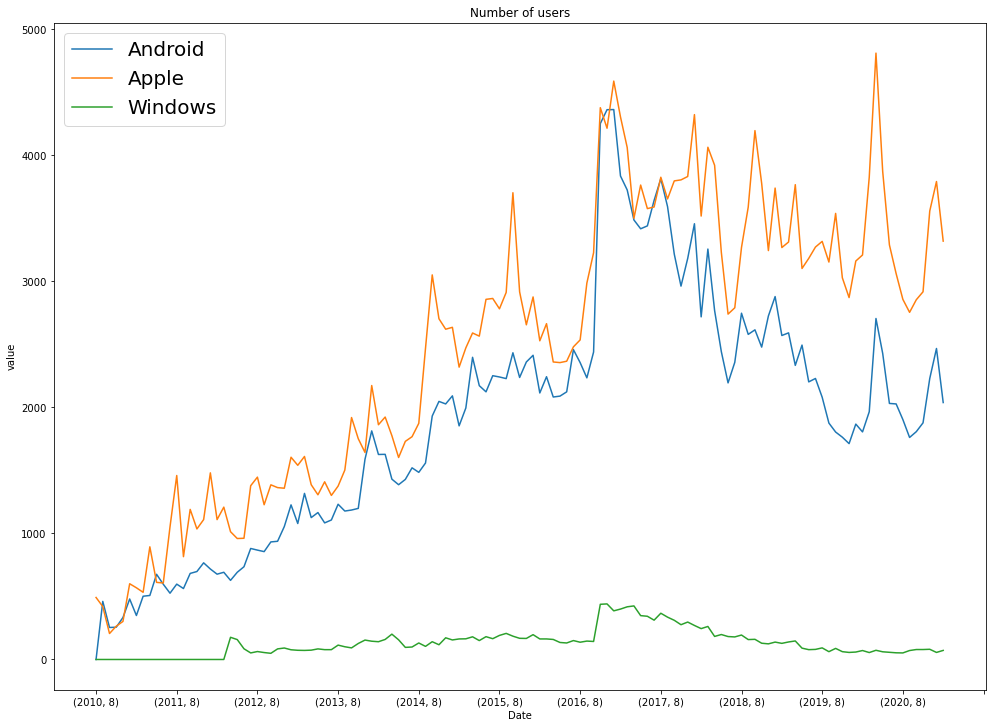

In [258]:
ax = sns.lineplot(x='Date',y='value',hue='variable',data=Pyt2Comb)
tick_spacing = 12
ax.xaxis.set_major_locator(plticker.MultipleLocator(tick_spacing))
ax.set_title("Number of users")
ax.legend(prop={'size':20})
rcParams['figure.figsize'] = 16.7,12.27
plt.savefig("pyt2.jpg",dpi=90)
plt.show()

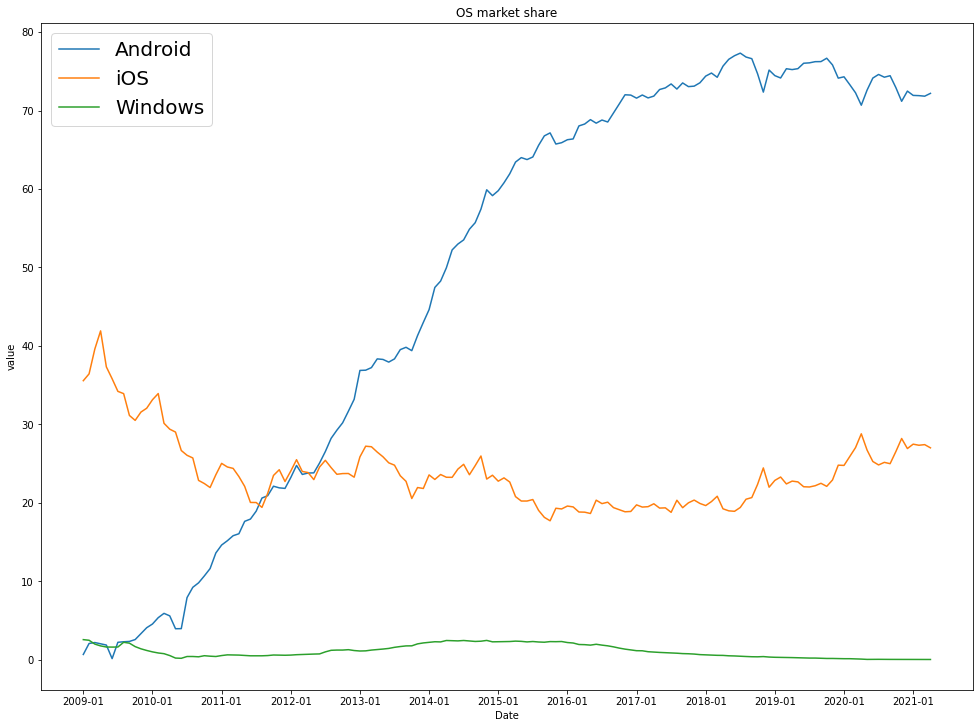

In [260]:
ax = sns.lineplot(x='Date',y='value',hue='variable',data=pd.melt(Pyt2,'Date'))
tick_spacing = 12
ax.xaxis.set_major_locator(plticker.MultipleLocator(tick_spacing))
ax.set_title("OS market share")
ax.legend(prop={'size':20})
rcParams['figure.figsize'] = 16.7,12.27
plt.savefig("pyt2_fromext.jpg",dpi=90)
plt.show()

In [87]:
AndroidPyt3 = pd.read_csv("AndroidPyt3.csv")
ApplePyt3 = pd.read_csv("ApplePyt3.csv")
WindowsPyt3 = pd.read_csv("WindowsPyt3.csv")
AndroidPyt3 = AndroidPyt3.iloc[10:138]
ApplePyt3 = ApplePyt3.iloc[16:]

In [88]:
Pyt3 = pd.concat([AndroidPyt3,ApplePyt3,WindowsPyt3],keys=["Android","Apple","Windows"])
Pyt3.reset_index(inplace=True)  
Pyt3.columns = ['OS','id','monthYear','activity']


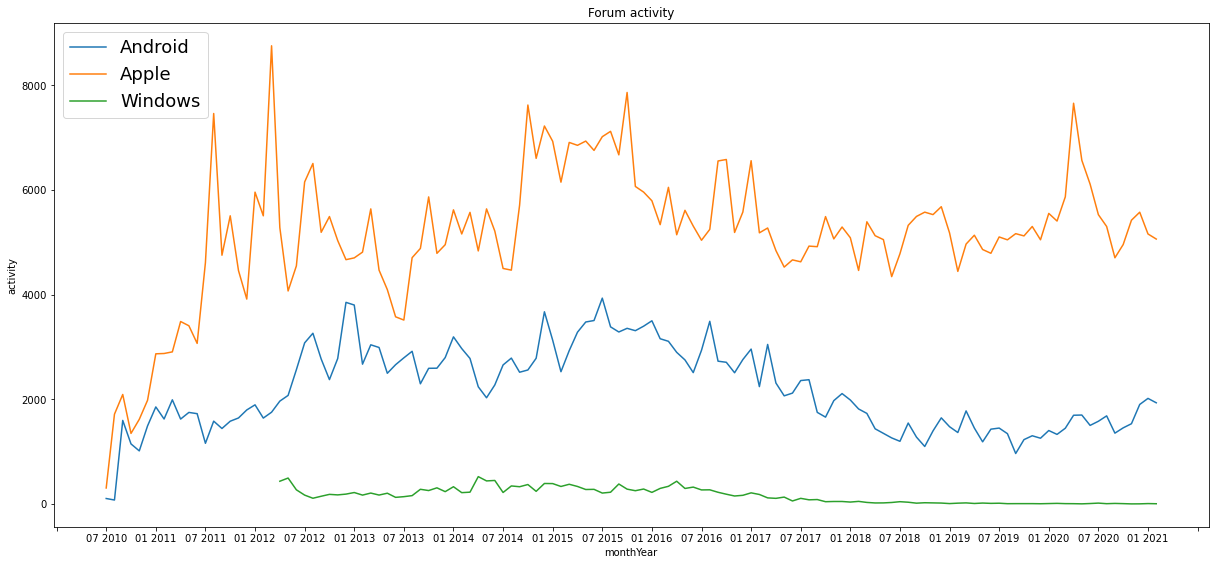

In [94]:
ax = sns.lineplot(x='monthYear',y='activity',hue='OS',data=Pyt3)
tick_spacing = 6
ax.xaxis.set_major_locator(plticker.MultipleLocator(tick_spacing))
ax.set_title("Forum activity")
ax.legend(prop={'size':18})
rcParams['figure.figsize'] = 10.7,19.27
plt.savefig("pyt3.jpg",dpi=90)
plt.show()

,monthYear,aktywnosc
0,05 2009,2
1,07 2009,7
2,08 2009,2
3,09 2009,6
4,10 2009,10
...,...,...
133,10 2020,1454
134,11 2020,1533
135,12 2020,1901
136,01 2021,2017


In [31]:
WindowsPyt3

,monthYear,aktywnosc
0,04 2012,434
1,05 2012,495
2,06 2012,270
3,07 2012,169
4,08 2012,109
...,...,...
101,10 2020,6
102,11 2020,1
103,12 2020,2
104,01 2021,7


In [70]:
ApplePyt3.head(30)

,monthYear,aktywnosc
5,07 2009,37
6,08 2009,26
7,09 2009,14
8,10 2009,39
9,12 2009,6
10,01 2010,10
11,02 2010,6
12,03 2010,7
13,04 2010,4
14,05 2010,1


In [77]:
AndroidPyt3.head(30)

,monthYear,aktywnosc
0,05 2009,2
1,07 2009,7
2,08 2009,2
3,09 2009,6
4,10 2009,10
5,12 2009,1
6,01 2010,2
7,03 2010,4
8,04 2010,1
9,05 2010,1


In [56]:
WindowsPyt3.head(30)

,monthYear,aktywnosc
0,04 2012,434
1,05 2012,495
2,06 2012,270
3,07 2012,169
4,08 2012,109
5,09 2012,147
6,10 2012,183
7,11 2012,173
8,12 2012,188
9,01 2013,218


In [203]:
additional_1 = pd.read_excel('temp.xlsx',sheet_name=0)
additional_1 = additional_1.iloc[:10]
additional_1

,Etykiety wierszy,Średnia z iPhone*
0,2012,0.499975
1,2013,0.530875
2,2014,0.556275
3,2015,0.659575
4,2016,0.624800
5,2017,0.604700
6,2018,0.618050
7,2019,0.538925
8,2020,0.489400
9,2021,0.561850


In [200]:
additional_2 = pd.read_excel('temp.xlsx',sheet_name=1)
additional_2

,Characteristic,iPhone,Mac,iPad,"Wearables, home and accessories",Services,rok
0,2Q '21,0.5351,0.1016,0.0871,0.0875,0.1887,2021
1,1Q '21,0.5886,0.0778,0.0757,0.1164,0.1414,2021
2,4Q '20,0.4090,0.1400,0.1050,0.1220,0.2250,2020
3,3Q '20,0.4426,0.1186,0.1103,0.1081,0.2204,2020
4,2Q '20,0.4970,0.0918,0.0750,0.1078,0.2289,2020
5,1Q '20,0.6090,0.0780,0.0651,0.1090,0.1385,2020
6,4Q '19,0.5210,0.1092,0.0727,0.1018,0.1954,2019
7,3Q '19,0.4829,0.1082,0.0933,0.1027,0.2129,2019
8,2Q '19,0.5352,0.0950,0.0840,0.0884,0.1974,2019
9,1Q '19,0.6166,0.0880,0.0798,0.0867,0.1290,2019


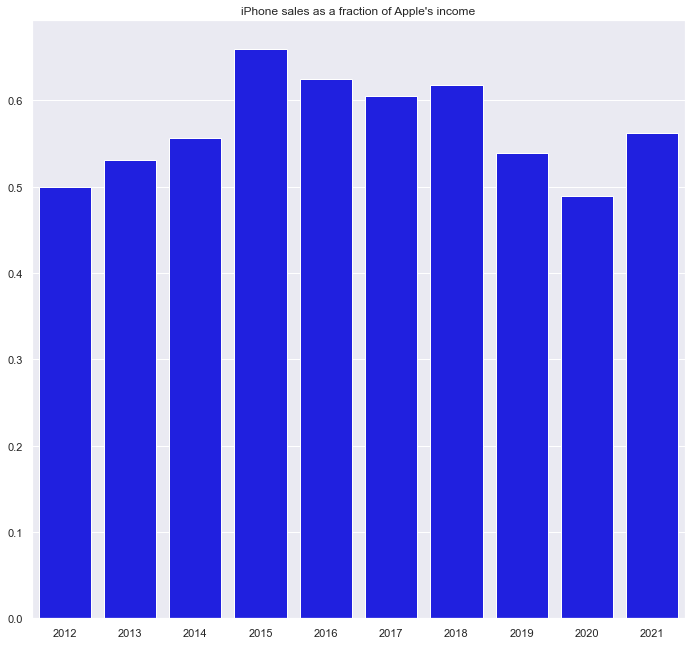

In [309]:
sns.set_theme()
ax = sns.barplot(x='Etykiety wierszy',y='Średnia z iPhone*',data=additional_1,color='blue')
ax.set_title("iPhone sales as a fraction of Apple's income")
ax.set_xlabel("")
ax.set_ylabel("")
rcParams['figure.figsize'] = 11.7,8
plt.savefig("slupki.jpg",dpi=90)
plt.show()

A:\Inzynieria_i_Analiza_Danych_PW\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


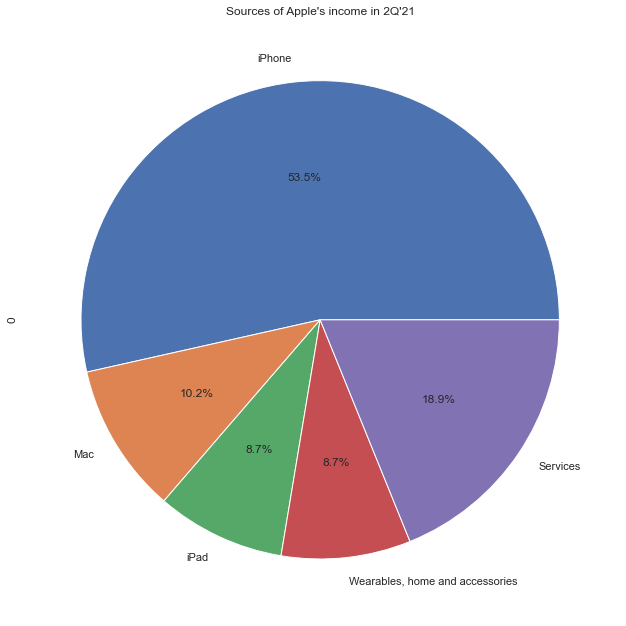

In [308]:
ax = additional_2.iloc[0,1:6].plot.pie(autopct='%1.1f%%')
ax.set_title("Sources of Apple's income in 2Q'21")
rcParams['figure.figsize'] = 11.7,11
plt.savefig("kolo.jpg",dpi=90)
plt.show()

##  Pytanie 4 

In [345]:
Win4 = pd.read_csv('WindowsPhonePyt4Model.csv')
And4 = pd.read_csv('AndroidPyt4Model.csv')
Apple4 = pd.read_csv('ApplePyt4Model.csv')
Win4 = Win4.loc[Win4.UpVotes != 0]
And4 = And4.loc[And4.UpVotes != 0]
Apple4 = Apple4.loc[Apple4.UpVotes != 0]
Win4 = Win4.loc[Win4.Id != -1]
And4 = And4.loc[And4.Id != -1]
Apple4 = Apple4.loc[Apple4.Id != -1]

In [355]:
def groups_average_upvotes(df,name):
    groups = list(df.groupby('year'))
    s = {
        'year':[el[0] for el in groups],
         "upvotes_average":[el[1].UpVotes.quantile(q=0.75) for el in groups]
    }
    df = pd.DataFrame(s)
    ax = sns.barplot(x='year',y='upvotes_average',data=df,color='blue')
    ax.set_title(name,fontsize = 18)
    rcParams['figure.figsize'] = 11.7,8
    plt.savefig(f"{name}.jpg",dpi=90)
    plt.show()

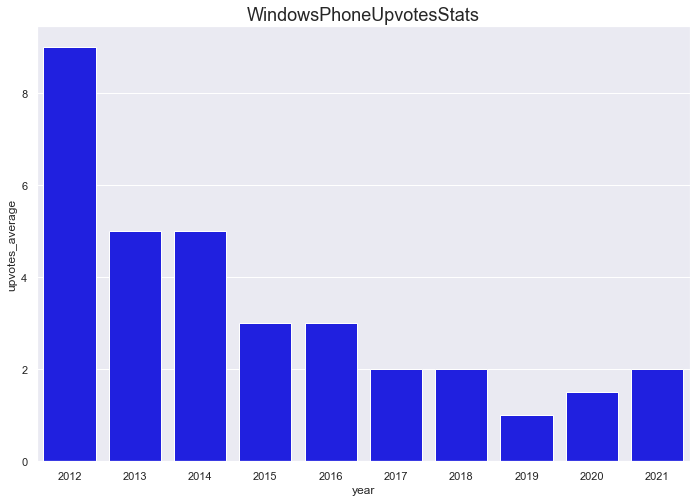

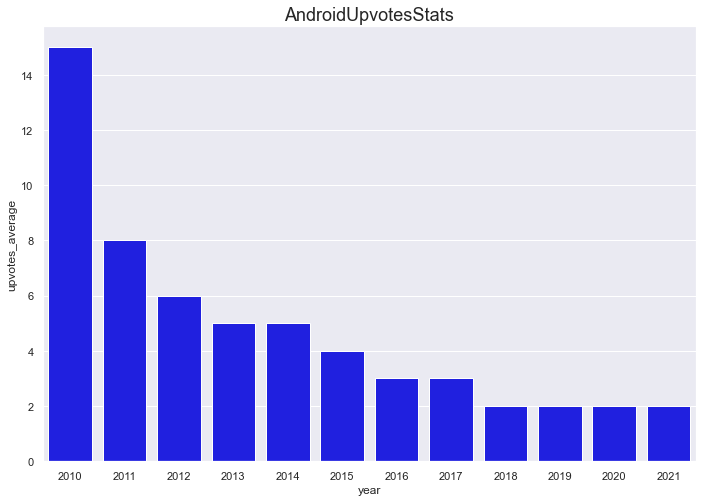

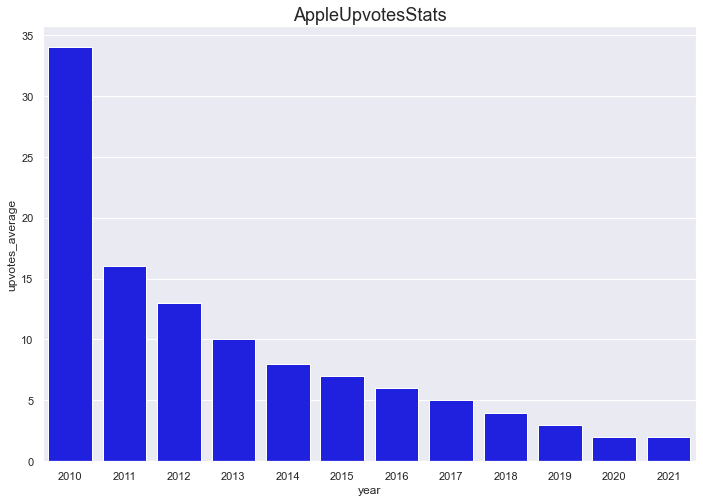

In [356]:
groups_average_upvotes(Win4,'WindowsPhoneUpvotesStats')
groups_average_upvotes(And4,'AndroidUpvotesStats')
groups_average_upvotes(Apple4,'AppleUpvotesStats')